---
title: Images
authors:
  - name: Sébastien Boisgérault
    affiliations:
      - Mines Paris – PSL University
      - Institut des Transformations Numériques
---

In [1]:
import requests

import torch
import torchvision

import PIL
import matplotlib.pyplot as plt

In [2]:
IMAGE_URL = "https://unsplash.com/photos/3k9PGKWt7ik/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Nnx8cmFpbmJvd3xlbnwwfDB8fHwxNzEyODI5NTAxfDA&force=true&w=640"
IMAGE_PATH = "data/pottery.jpg"

In [3]:
response = requests.get(IMAGE_URL)
with open(IMAGE_PATH, mode="bw") as file:
    file.write(response.content)

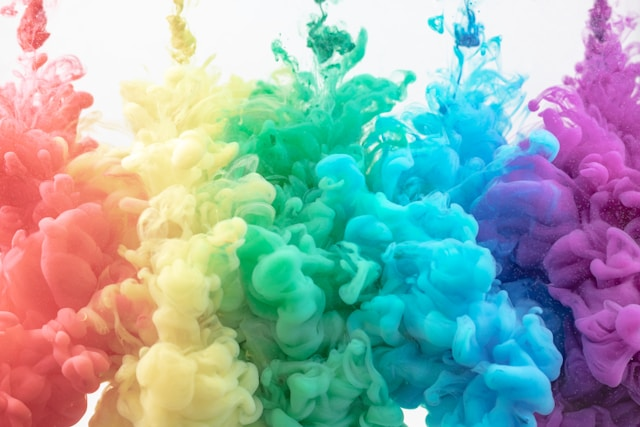

In [4]:
image = PIL.Image.open(IMAGE_PATH)
image

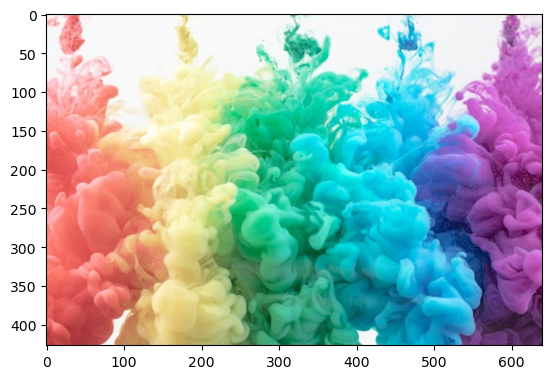

In [5]:
plt.imshow(image)
None

In [6]:
image_to_tensor = torchvision.transforms.PILToTensor()
tensor_to_image = torchvision.transforms.ToPILImage()

In [7]:
t = image_to_tensor(image)
t

tensor([[[246, 244, 244,  ..., 235, 235, 234],
         [249, 247, 246,  ..., 235, 235, 235],
         [253, 251, 249,  ..., 235, 235, 235],
         ...,
         [189, 189, 188,  ...,  76,  72,  72],
         [188, 188, 187,  ...,  74,  69,  67],
         [186, 185, 185,  ...,  71,  66,  64]],

        [[247, 248, 248,  ..., 233, 230, 229],
         [247, 247, 248,  ..., 233, 230, 230],
         [244, 245, 245,  ..., 233, 230, 230],
         ...,
         [ 64,  64,  63,  ...,  34,  28,  25],
         [ 63,  63,  62,  ...,  30,  22,  20],
         [ 63,  62,  62,  ...,  27,  19,  17]],

        [[249, 249, 247,  ..., 238, 237, 236],
         [250, 247, 247,  ..., 238, 237, 237],
         [247, 245, 244,  ..., 238, 237, 237],
         ...,
         [ 70,  70,  69,  ...,  84,  79,  77],
         [ 69,  69,  68,  ...,  81,  74,  72],
         [ 68,  67,  67,  ...,  78,  71,  69]]], dtype=torch.uint8)

In [8]:
t.shape # num_channel, height, width

torch.Size([3, 427, 640])

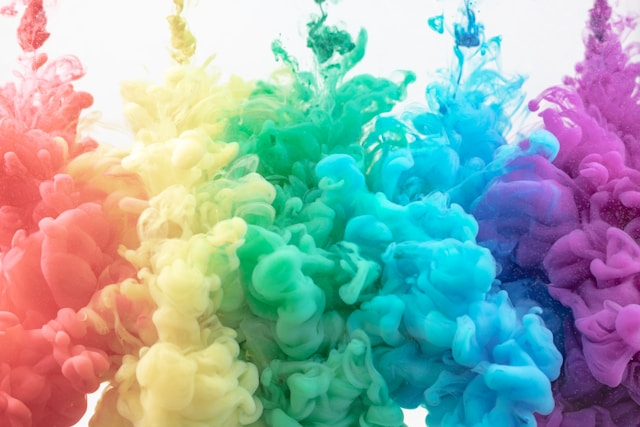

In [9]:
image = tensor_to_image(t)
image

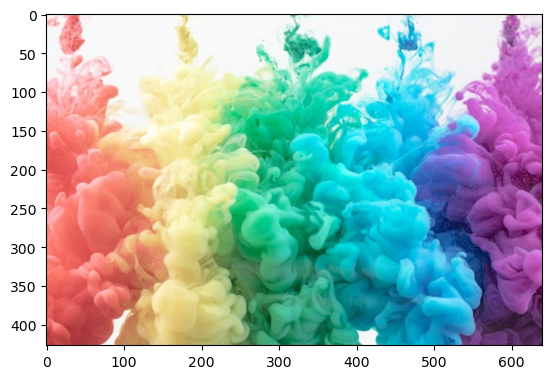

In [10]:
plt.imshow(t.permute(1, 2, 0)) # height, width, num_channels
None

## Cropping

In [11]:
t_crop = t[:,100:200,100:300]

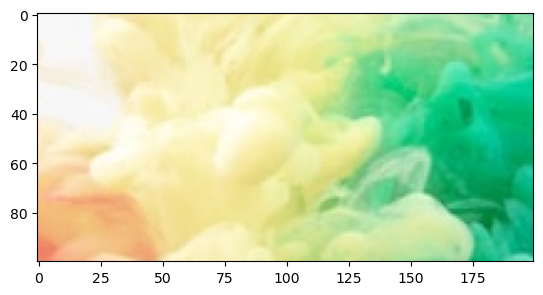

In [12]:
plt.imshow(t_crop.permute(1, 2, 0))
None

## Color Components

In [13]:
R = t[0,:,:]
R

tensor([[246, 244, 244,  ..., 235, 235, 234],
        [249, 247, 246,  ..., 235, 235, 235],
        [253, 251, 249,  ..., 235, 235, 235],
        ...,
        [189, 189, 188,  ...,  76,  72,  72],
        [188, 188, 187,  ...,  74,  69,  67],
        [186, 185, 185,  ...,  71,  66,  64]], dtype=torch.uint8)

In [14]:
print(R.shape) # height, width

torch.Size([427, 640])


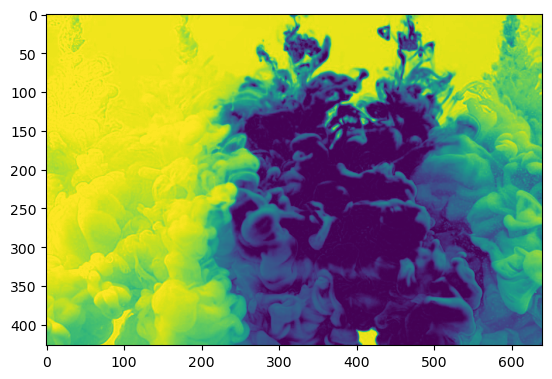

In [15]:
plt.imshow(R)
None

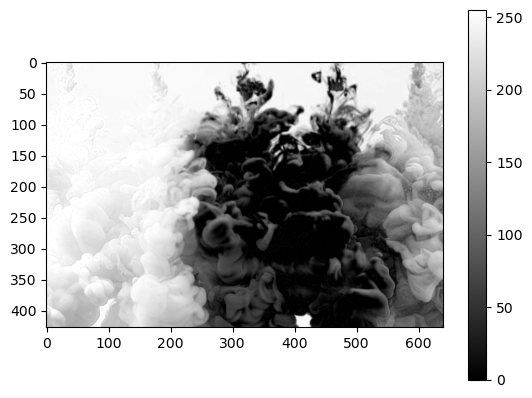

In [16]:
plt.imshow(R, cmap="grey")
plt.colorbar()
None

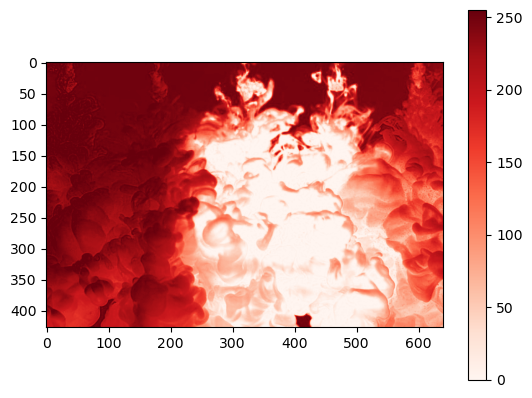

In [17]:
plt.imshow(R, cmap="Reds")
plt.colorbar()
None

In [18]:
G = t[1,:,:]
B = t[2,:,:]

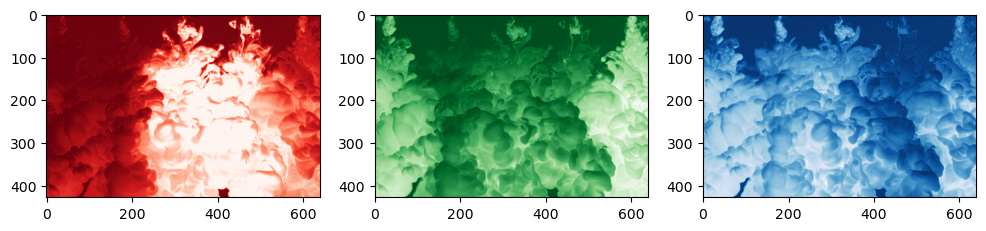

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(12)
ax1.imshow(R, cmap="Reds")
ax2.imshow(G, cmap="Greens")
ax3.imshow(B, cmap="Blues")
None

## Floating-Point Images

In [20]:
R.dtype

torch.uint8

In [21]:
Rf = R.type(torch.float64) / 256  # images with floating-points data should be in the [0, 1) range
Gf = G.type(torch.float64) / 256
Bf = B.type(torch.float64) / 256

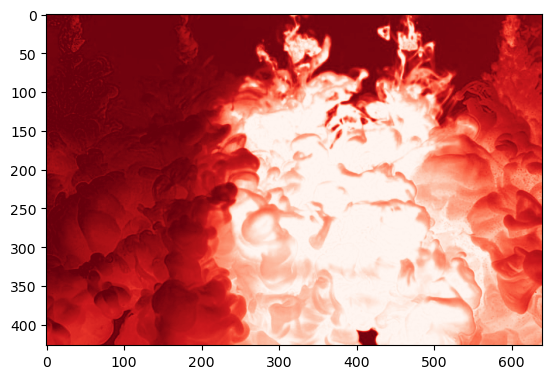

In [22]:
plt.imshow(Rf, cmap="Reds")
None

## Luminance

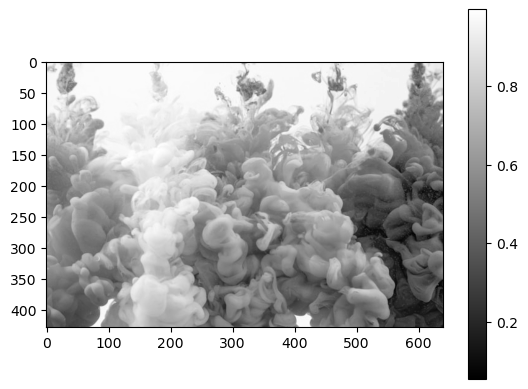

In [23]:
Lf = 0.2126*Rf + 0.7152*Gf + 0.0722*Bf
plt.imshow(Lf, cmap="grey")
plt.colorbar()
None

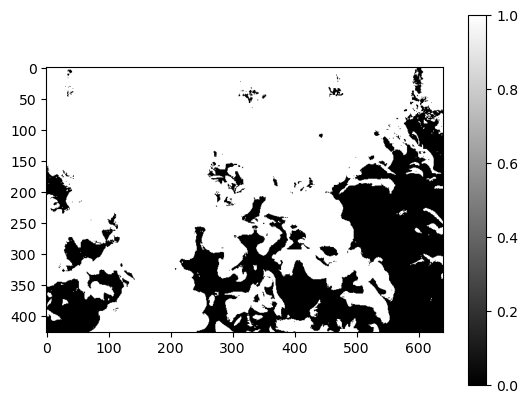

In [24]:
Lf = 0.2126*Rf + 0.7152*Gf + 0.0722*Bf
plt.imshow(Lf > 0.5, cmap="grey")
plt.colorbar()
None

## Hue, Saturation, Value (HSV)

**TODO.** <https://en.wikipedia.org/wiki/HSL_and_HSV>

**TODO.** Increase/decrease saturation. Increase/decrase value, Rotate colors?

In [25]:
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

In [26]:
rgb = (t / 255.0).permute(1, 2, 0)
hsv = torch.tensor(rgb_to_hsv(rgb))

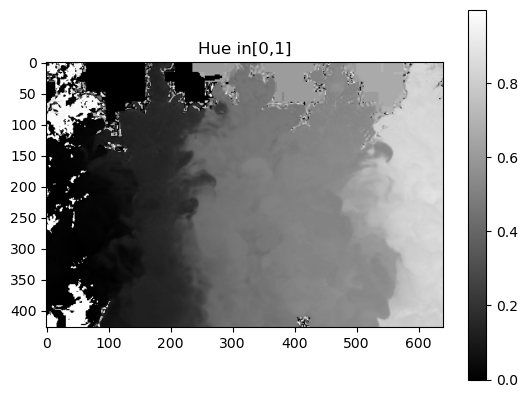

In [27]:
plt.imshow(hsv[...,0], cmap="grey")
plt.colorbar()
plt.title("Hue in[0,1]")
None

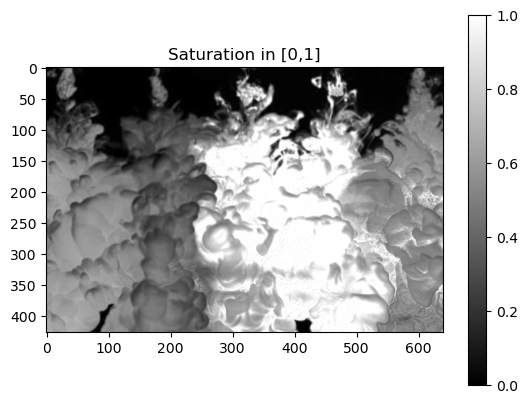

In [28]:
plt.imshow(hsv[...,1], cmap="grey")
plt.colorbar()
plt.title("Saturation in [0,1]")
None

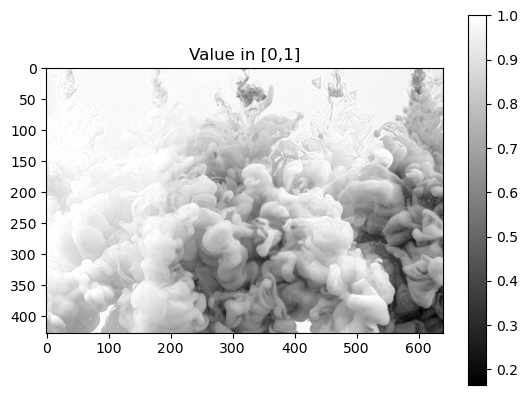

In [29]:
plt.imshow(hsv[...,2], cmap="grey")
plt.colorbar()
plt.title("Value in [0,1]")
None

In [30]:
hsv.shape
H, S, V = hsv.permute(2, 0, 1)

In [31]:
H_new = (H + (180.0 / 360)) % 1.0

In [32]:
hsv = torch.stack([H_new, S, V])
hsv.shape

torch.Size([3, 427, 640])

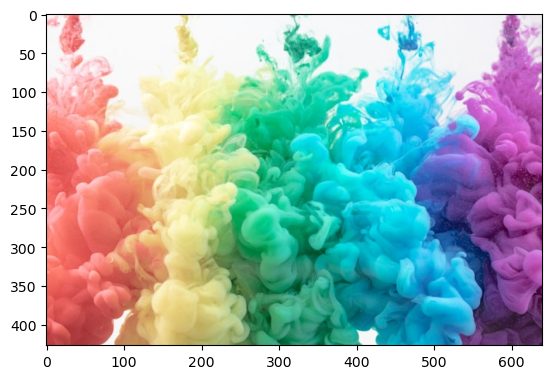

In [33]:
plt.imshow(rgb)
None

(427, 640, 3)


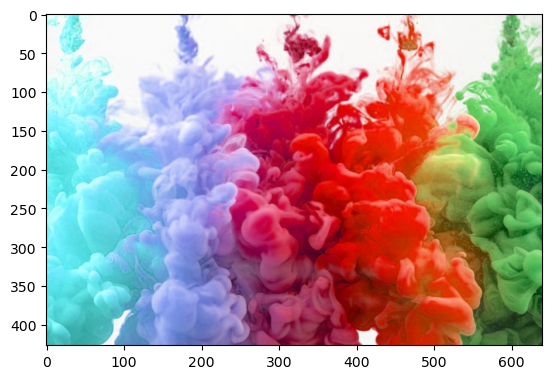

In [34]:
rgb_new = hsv_to_rgb(hsv.permute(1, 2, 0))
print(rgb_new.shape)
plt.imshow(rgb_new)
None

In [35]:
S_new = S/2
hsv = torch.stack([H, S_new, V])
rgb_new = hsv_to_rgb(hsv.permute(1, 2, 0))
print(rgb_new.shape)

(427, 640, 3)


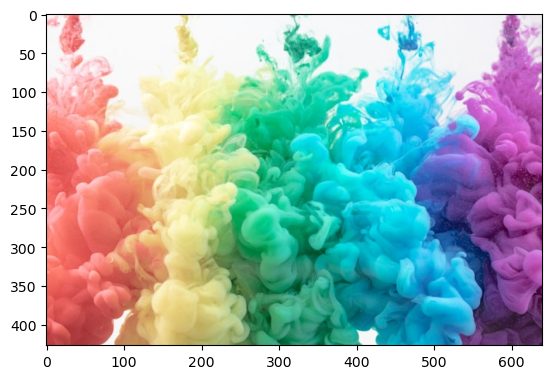

In [36]:
plt.imshow(rgb)
None

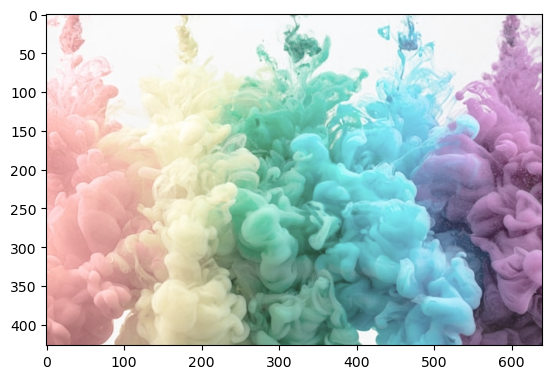

In [37]:
plt.imshow(rgb_new)
None

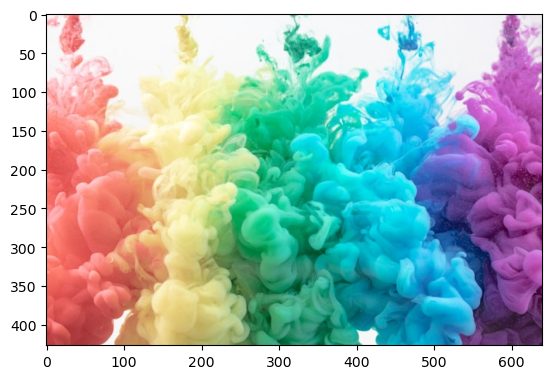

In [38]:
plt.imshow(rgb)
None

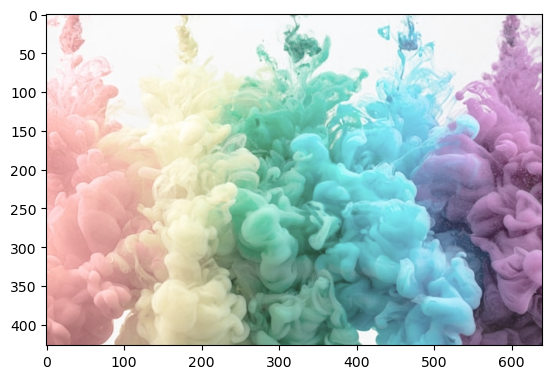

In [39]:
plt.imshow(rgb_new)
None

In [40]:
V_new = V/2
hsv = torch.stack([H, S, V_new])
rgb_new = hsv_to_rgb(hsv.permute(1, 2, 0))
print(rgb_new.shape)

(427, 640, 3)


## Color Statistics

In [41]:
import pandas as pd

In [42]:
tf = t.type(torch.float64) / 256

In [43]:
tf.shape

torch.Size([3, 427, 640])

In [44]:
_, h, w = tf.shape

In [45]:
colors = tf.permute(1, 2, 0).reshape(w*h, 3)

In [46]:
colors.mean(dim=0)

tensor([0.5724, 0.6716, 0.6640], dtype=torch.float64)

In [47]:
colors.std(dim=0)

tensor([0.3775, 0.2449, 0.2213], dtype=torch.float64)

In [48]:
df = pd.DataFrame()
df

Empty DataFrame
Columns: []
Index: []

In [49]:
df["R"] = colors[:,0]
df["G"] = colors[:,1]
df["B"] = colors[:,2]
df

R         G         B
0       0.960938  0.964844  0.972656
1       0.953125  0.968750  0.972656
2       0.953125  0.968750  0.964844
3       0.953125  0.976562  0.968750
4       0.968750  0.976562  0.972656
...          ...       ...       ...
273275  0.359375  0.203125  0.398438
273276  0.320312  0.156250  0.351562
273277  0.277344  0.105469  0.304688
273278  0.257812  0.074219  0.277344
273279  0.250000  0.066406  0.269531

[273280 rows x 3 columns]

In [50]:
#df.plot(kind="kde")

## Edition D'Images Par Equation de Poisson

In [51]:
tf = t/255.0

In [52]:
tf.shape

torch.Size([3, 427, 640])

In [53]:
r, g, b = tf

In [54]:
i = slice(100, 200)
j = slice(100, 300)

In [55]:
r[i, j] = torch.rand(r[i, j].shape) #1.0
g[i, j] = torch.rand(g[i, j].shape) #0.0
b[i, j] = torch.rand(b[i, j].shape) #0.0

In [56]:
rgb = torch.stack((r, g, b))
rgb.shape

torch.Size([3, 427, 640])

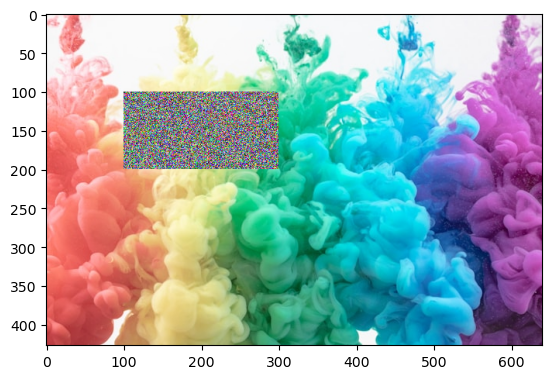

In [57]:
plt.imshow(rgb.permute(1, 2, 0))
None

In [58]:
i_up = slice(i.start - 1, i.stop - 1)
i_down = slice(i.start + 1, i.stop + 1)
j_left = slice(j.start - 1, j.stop - 1)
j_right = slice(j.start + 1, j.stop + 1)

In [59]:
import time
t = time.time()
alpha = 0.1
for _ in range(100_000):
    region = rgb[:, i, j]
    region_up = rgb[:, i_up, j]
    region_down = rgb[:, i_down, j]
    region_left = rgb[:, i, j_left]
    region_right = rgb[:, i, j_right]
    rgb[:, i, j] += alpha * (region_up - region) + alpha * (region_down - region) \
                + alpha * (region_left - region) + alpha * (region_right - region)
print(time.time() - t)

15.355025053024292


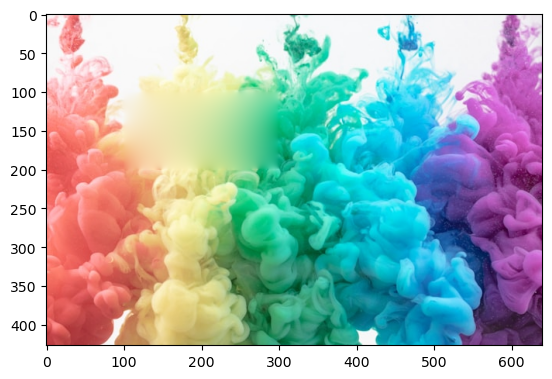

In [60]:
plt.imshow(rgb.permute(1, 2, 0))
None

In [61]:
rgb.shape

torch.Size([3, 427, 640])

In [62]:
rgb[:, i, j]

tensor([[[0.9726, 0.9726, 0.9726,  ..., 0.4387, 0.4262, 0.4251],
         [0.9726, 0.9726, 0.9726,  ..., 0.4755, 0.4801, 0.5017],
         [0.9726, 0.9727, 0.9727,  ..., 0.5007, 0.5171, 0.5526],
         ...,
         [0.9455, 0.9477, 0.9493,  ..., 0.2182, 0.1857, 0.1396],
         [0.9499, 0.9488, 0.9487,  ..., 0.2665, 0.2413, 0.2047],
         [0.9561, 0.9491, 0.9462,  ..., 0.3222, 0.3082, 0.2851]],

        [[0.9723, 0.9720, 0.9718,  ..., 0.8678, 0.8695, 0.8666],
         [0.9720, 0.9715, 0.9710,  ..., 0.8774, 0.8809, 0.8871],
         [0.9716, 0.9708, 0.9701,  ..., 0.8831, 0.8895, 0.9029],
         ...,
         [0.5345, 0.5541, 0.5718,  ..., 0.7564, 0.7318, 0.6929],
         [0.5419, 0.5556, 0.5699,  ..., 0.7893, 0.7714, 0.7418],
         [0.5521, 0.5566, 0.5659,  ..., 0.8291, 0.8229, 0.8088]],

        [[0.9712, 0.9704, 0.9698,  ..., 0.6501, 0.6573, 0.6625],
         [0.9695, 0.9680, 0.9669,  ..., 0.6667, 0.6773, 0.6947],
         [0.9661, 0.9652, 0.9638,  ..., 0.6769, 0.6904, 0.

In [63]:
r, g, b =  rgb

In [64]:
def laplacian(channel):
    h, w = channel.shape
    lap = torch.zeros((h-1, w-1))
    lap = channel[2:, 1:-1] + channel[:-2, 1:-1] + channel[1:-1, 2:] + channel[1:-1,:-2] \
        - 4.0 * channel[1:-1, 1:-1]
    return lap

In [65]:
hsv = rgb_to_hsv(rgb.permute(1, 2, 0))
hsv

array([[[0.6111111 , 0.01204819, 0.9764706 ],
        [0.53333336, 0.02008032, 0.9764706 ],
        [0.45833334, 0.01612903, 0.972549  ],
        ...,
        [0.73333335, 0.0210084 , 0.93333334],
        [0.7857143 , 0.02953586, 0.92941177],
        [0.7857143 , 0.02966101, 0.9254902 ]],

       [[0.77777773, 0.012     , 0.98039216],
        [0.        , 0.        , 0.96862745],
        [0.41666666, 0.00806452, 0.972549  ],
        ...,
        [0.73333335, 0.0210084 , 0.93333334],
        [0.7857143 , 0.02953586, 0.92941177],
        [0.7857143 , 0.02953586, 0.92941177]],

       [[0.9444444 , 0.03557312, 0.99215686],
        [0.        , 0.02390438, 0.9843137 ],
        [0.03333334, 0.02008032, 0.9764706 ],
        ...,
        [0.73333335, 0.0210084 , 0.93333334],
        [0.7857143 , 0.02953586, 0.92941177],
        [0.7857143 , 0.02953586, 0.92941177]],

       ...,

       [[0.992     , 0.66137564, 0.7411765 ],
        [0.992     , 0.66137564, 0.7411765 ],
        [0.992     , 0

In [66]:
#new_i = slice(i.start-5, i.stop+5)
#new_j = slice(j.start-5, j.stop+5)
#print(new_i, new_j)
#r, g, b = rgb[:, new_i, new_j]
r, g, b = rgb

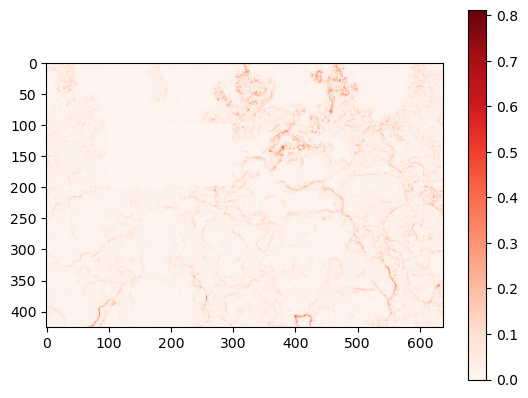

In [67]:
lap_r = laplacian(r)
plt.imshow(lap_r.abs(), cmap="Reds")
plt.colorbar()
None

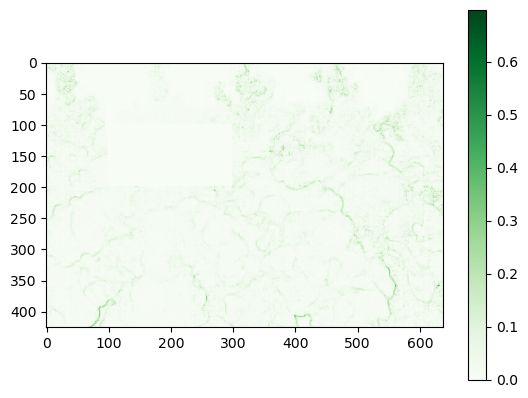

In [68]:
lap_g = laplacian(g)
plt.imshow(lap_g.abs(), cmap="Greens")
plt.colorbar()
None

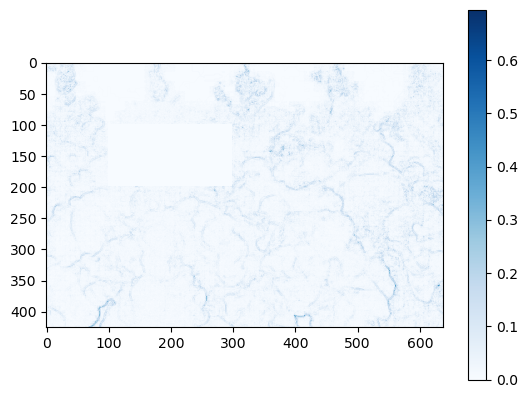

In [69]:
lap_b = laplacian(b)
plt.imshow(lap_b.abs(), cmap="Blues")
plt.colorbar()
None